In [2]:
from roboflow import Roboflow
from ultralytics import YOLOv10
import cv2
import supervision as sv

# Original Yolo10:
https://colab.research.google.com/github/roboflow/notebooks/blob/main/notebooks/train-yolov10-object-detection-on-custom-dataset.ipynb#scrollTo=Bf6A7E9glExI

In [11]:
path_to_weight = "/scr/u/yuanzf/yolov10/releases/download/v1.1/yolov10n.pt"
path_to_dataset = "/scr/u/yuanzf/02_timemachine/01_street_diversity"

In [7]:
# model = YOLOv10({path_to_weigh})
HOME = "/scr/u/yuanzf/02_timemachine/01_street_diversity"
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/scr/u/yuanzf/02_timemachine/01_street_diversity/datasets


NameError: name 'pwd' is not defined

In [8]:
!pwd

/scr/u/yuanzf/02_timemachine/01_street_diversity/datasets


In [9]:
# download the dataset
rf = Roboflow(api_key="lWOnH5HF7hdXgiIjDB27")
project = rf.workspace("hkudiversity").project("human-attr")
version = project.version(1)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to human-attr-1 in yolov5pytorch:: 100%|██████████| 2368/2368 [00:03<00:00, 635.96it/s]


In [10]:
%cd {HOME}

'/scr/u/yuanzf/02_timemachine/01_street_diversity/datasets/human-attr-1'

In [22]:
!yolo task=detect mode=train epochs=200 batch=32 plots=True \
model=/scr/u/yuanzf/yolov10/releases/download/v1.1/yolov10n.pt \
data={dataset.location}/data.yaml

New https://pypi.org/project/ultralytics/8.3.10 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.9.20 torch-2.0.1+cu117 CUDA:0 (Quadro RTX 6000, 24212MiB)
engine/trainer: task=detect, mode=train, model=/scr/u/yuanzf/yolov10/releases/download/v1.1/yolov10n.pt, data=/scr/u/yuanzf/02_timemachine/01_street_diversity/datasets/human-attr-1/data.yaml, epochs=200, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=Fa

In [16]:
from IPython.display import Image

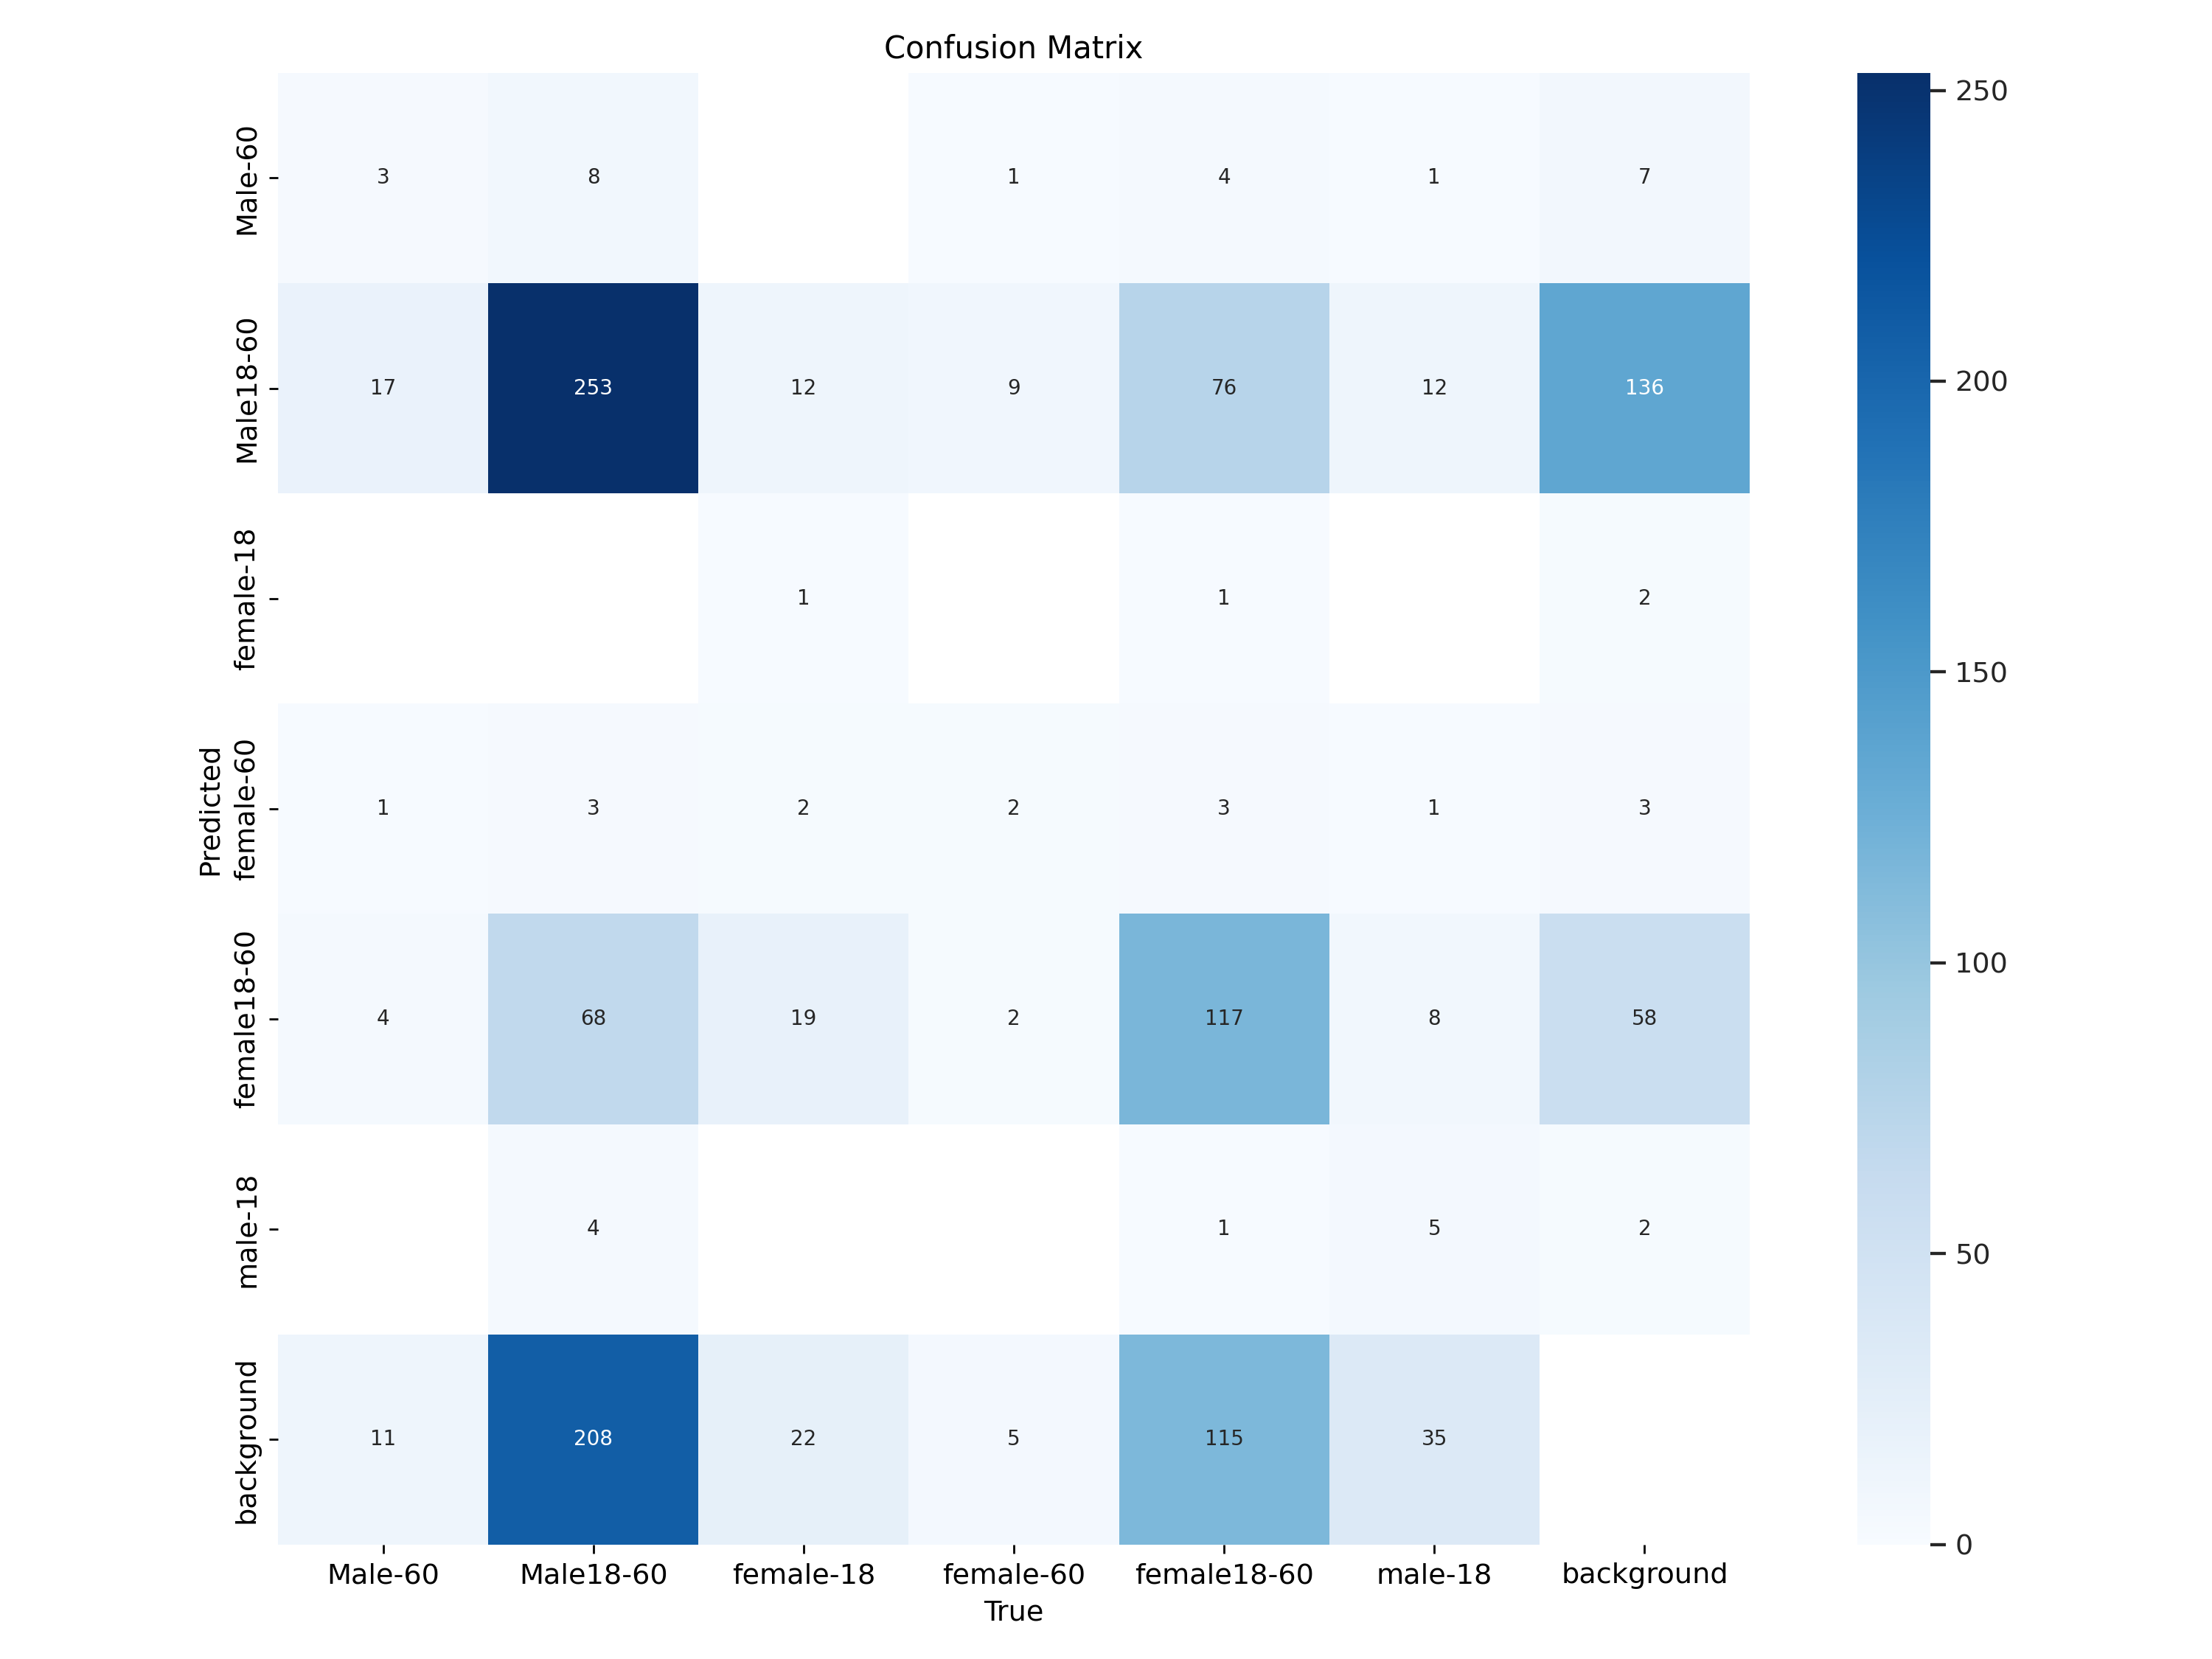

In [24]:
FILE_PATH = "/scr/u/yuanzf/yolov10/runs/detect/train9"
Image(filename=f'{FILE_PATH}/confusion_matrix.png', 
      width=600)

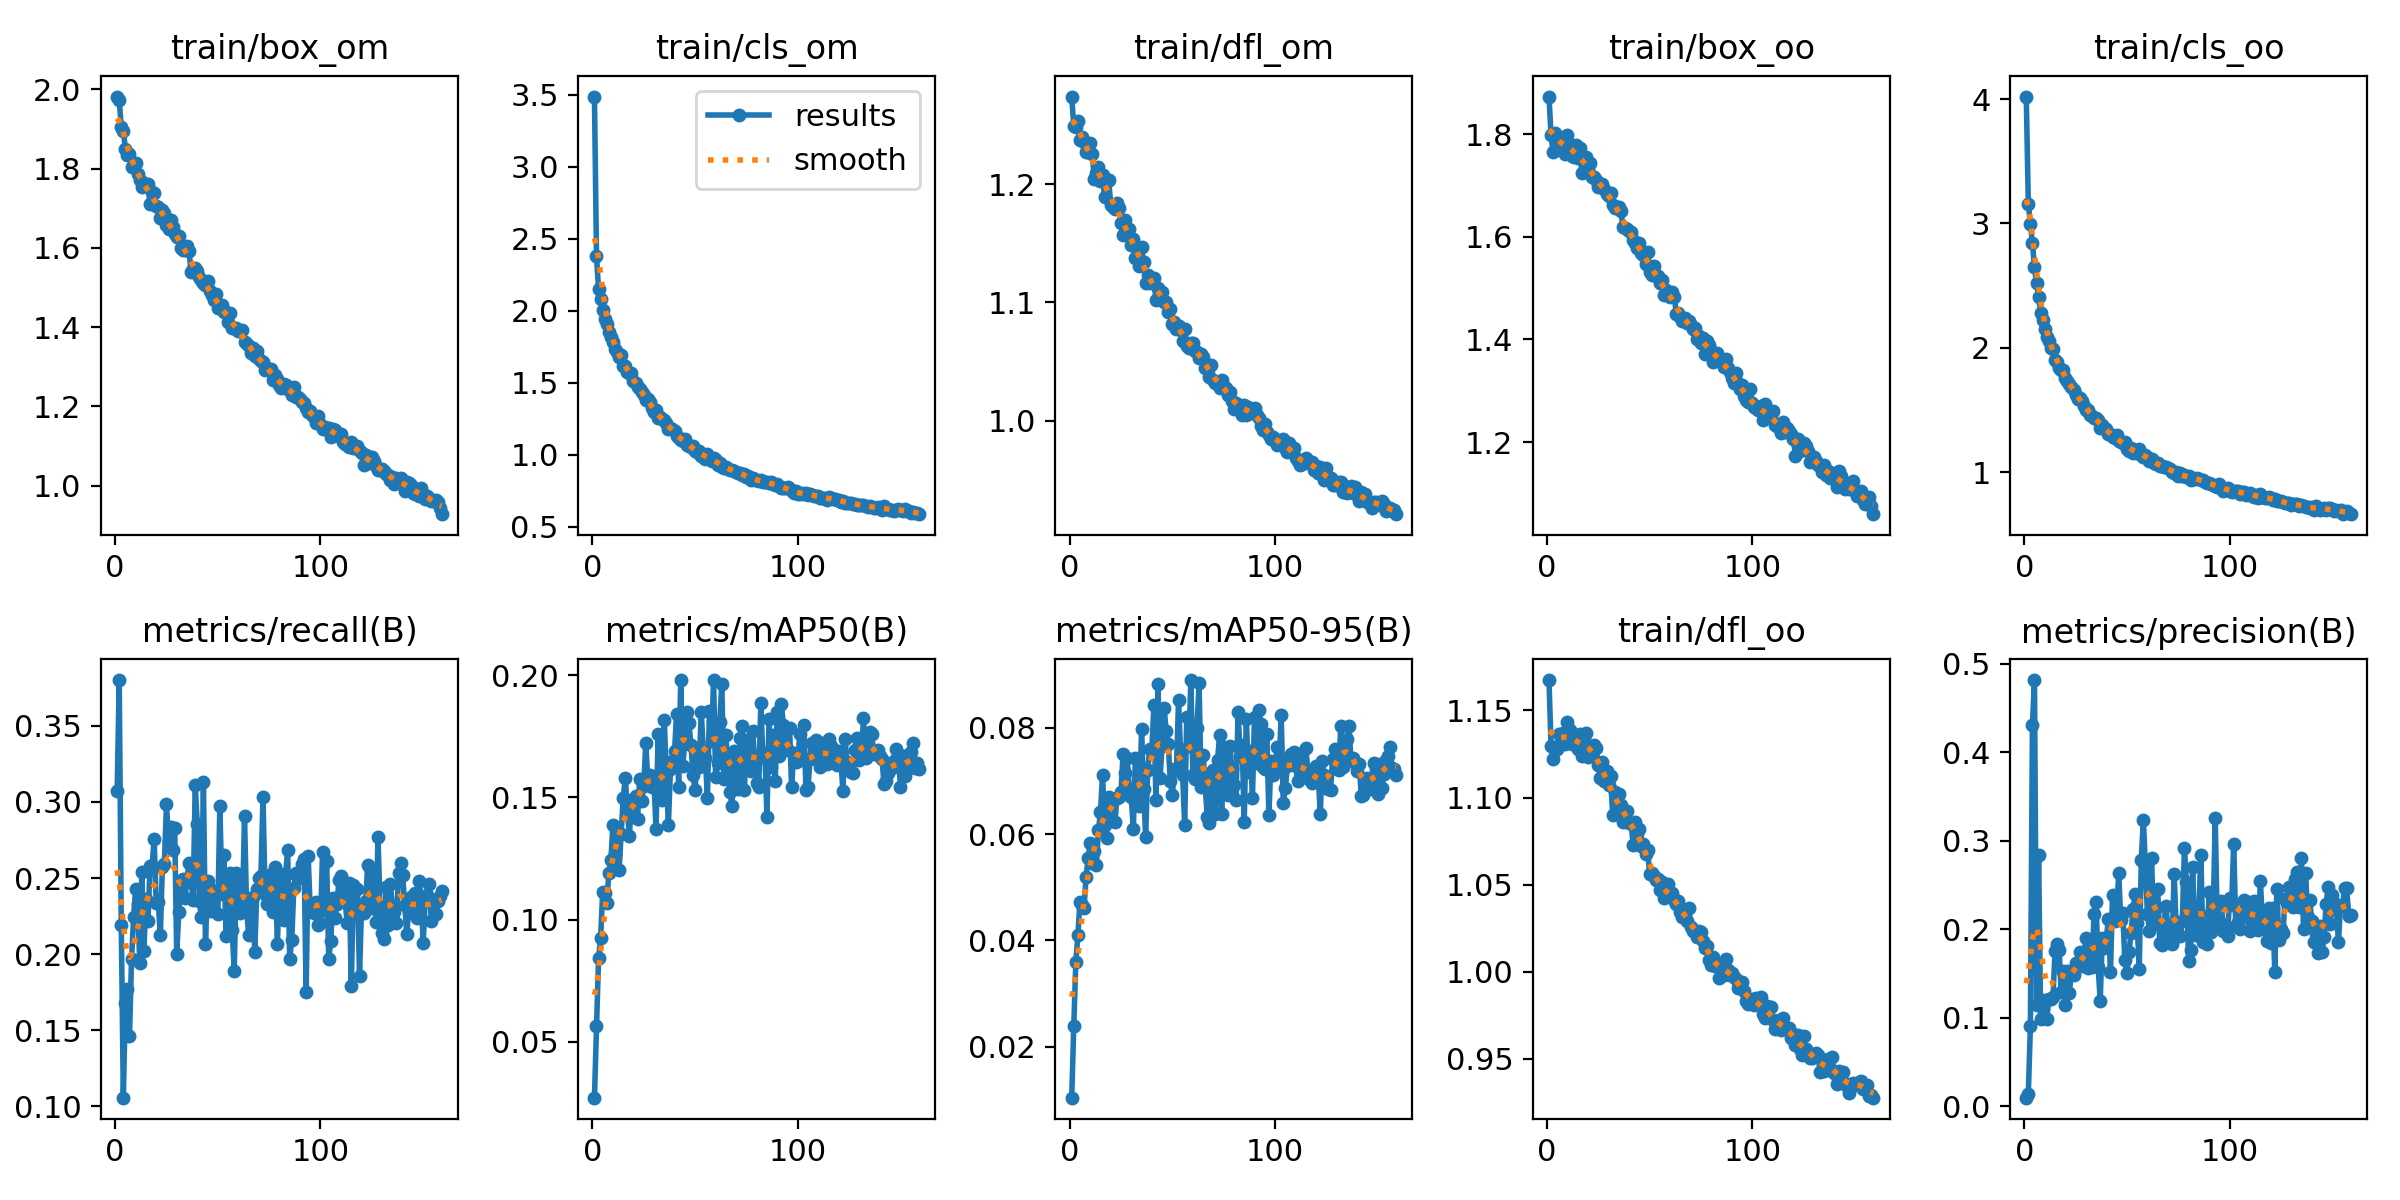

In [25]:
Image(filename=f'{FILE_PATH}/results.png', 
      width=600)

In [26]:
# Inference
model = YOLOv10(f'{FILE_PATH}/weights/best.pt')

In [27]:
dataset.location

'/scr/u/yuanzf/02_timemachine/01_street_diversity/datasets/human-attr-1'

In [28]:
dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/valid/images",
    annotations_directory_path=f"{dataset.location}/valid/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

In [29]:
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.
SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.



0: 640x640 6 Male18-60s, 5 female18-60s, 11.7ms
Speed: 2.1ms preprocess, 11.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


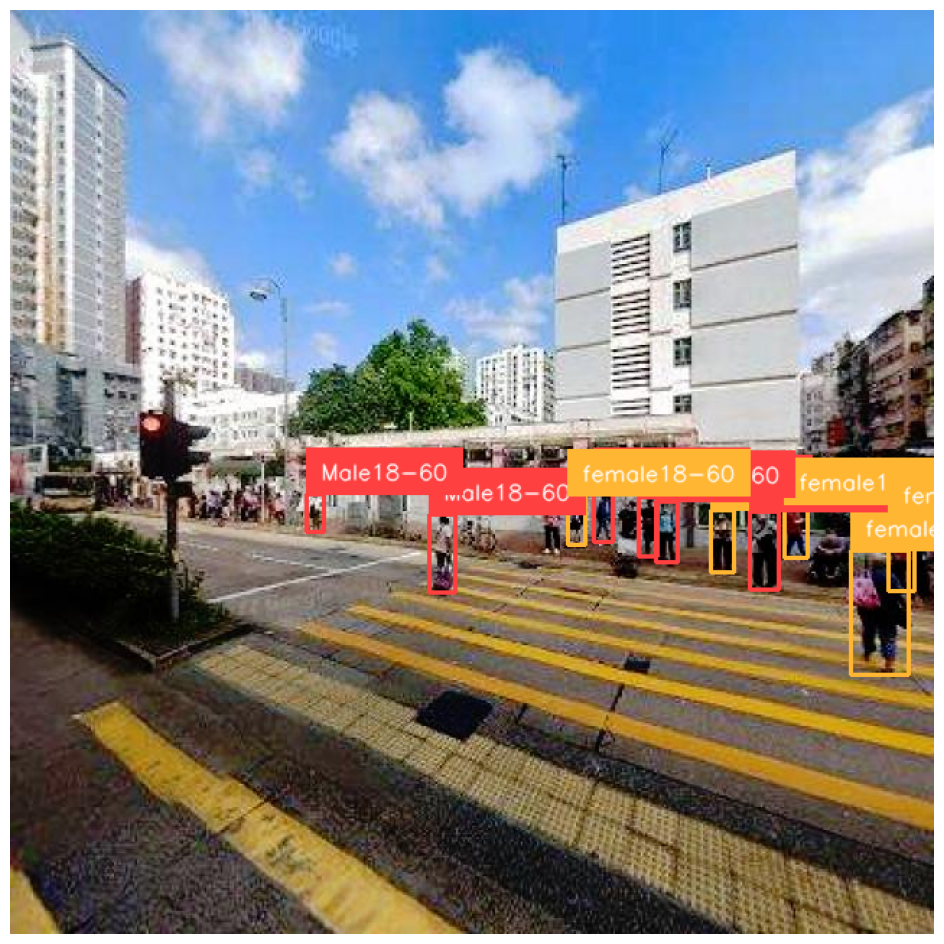

In [35]:
import random

random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]

results = model(source=random_image, conf=0.2)[0]
detections = sv.Detections.from_ultralytics(results)

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [36]:
detections

Detections(xyxy=array([[     485.47,      346.96,      501.83,      389.84],
       [     290.87,      349.41,      308.27,      403.21],
       [     447.45,      340.58,      462.68,      382.81],
       [     582.54,      374.57,      622.66,      460.37],
       [     205.42,      335.17,      217.84,      361.79],
       [     512.65,      347.39,      532.35,      401.88],
       [     536.01,      342.39,      552.22,      379.22],
       [      404.7,      335.73,      417.68,       368.5],
       [     435.18,      337.25,      448.67,      378.72],
       [     386.21,      336.02,       398.4,      370.68],
       [     608.67,       351.3,      626.36,      402.69]], dtype=float32), mask=None, confidence=array([    0.93855,     0.79376,     0.79126,     0.77243,     0.75727,     0.75022,     0.49005,     0.48911,     0.33299,     0.27145,     0.23037], dtype=float32), class_id=array([4, 1, 1, 4, 1, 1, 4, 1, 1, 4, 4]), tracker_id=None, data={'class_name': array(['female18-60

In [37]:
detections.data["class_name"]

array(['female18-60', 'Male18-60', 'Male18-60', 'female18-60', 'Male18-60', 'Male18-60', 'female18-60', 'Male18-60', 'Male18-60', 'female18-60', 'female18-60'], dtype='<U11')

In [39]:
line = """python 02_age_gender.py --city "{city}"
"""
%cd /home/yuanzf/uvi-time-machine/_script/e-street-diversity
import pandas as pd
city_meta = pd.read_csv("../city_meta.csv")
batch_size = 20 # 10 city one file
for i in range(0, len(city_meta), batch_size):
    cities = city_meta['City'][i:i+batch_size]
    cities = [x for x in cities if not x in ['New York', 'Hong Kong']]
    with open(f"run_{i}.sh", "w") as f:
        for city in cities:
            f.write(line.format(city=city))

/home/yuanzf/uvi-time-machine/_script/e-street-diversity
